In [0]:
import tensorflow
import numpy as np
from keras.layers import Dense,Input
from keras.models import Model
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
%matplotlib inline
#Importing the necessary libraries

In [3]:
(X_train,_),(X_test,_) = mnist.load_data() #Loading the data

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.astype('float32')/255

In [0]:
X_test = X_test.astype('float32')/255

Before this operation the type of the images was int and it was not scaled. These two lines of code act like a standard scaler and scales the values such that the algorithm can converge faster and successfully.

In [0]:
X_train = X_train.reshape(len(X_train),(np.prod(X_train.shape[1:])))

In [0]:
X_test = X_test.reshape(len(X_test),(np.prod(X_test.shape[1:])))

The input of the model must not be a 3 dimensional array, it must be 1 dimension. And this dimension corresponds to the 28 times 28 pixels we have in these images. So...28 * 28 = 784 pixels in total in one image. As I mentioned before, the input "layer" can not take a 2 or 3 dimensional array, and what array does our real values has? It has 784 values. And we make sure that this is what we give to the input layer. the np.prod is just a function that returns the product of X_test.shape[1:]] and all X_test.shape[1:] is 28 times 28 = 784.

In [0]:
X_train_noisy = X_train + np.random.normal(loc=0.0,scale=0.5,size=X_train.shape)

In [0]:
X_test_noisy = X_test + np.random.normal(loc=0.0,scale=0.5,size=X_test.shape)

This is the Denoising part of the code. Here we can keep the X_train without the noise to be tested later, does not matter. The np.random.normal takes these arguments - loc which is the mean of the distribution,the scale of the distribution, we could play with it after the training. And the size must be equal to the output shape of the function in this case X_train.

In [64]:
shape = X_train_noisy.shape
shape
#The shape fo the array we just created.

(60000, 784)

In [0]:
input_img = Input(shape=(shape,))
encoder = Dense(units=128,activation='relu')(input_img)
encoder = Dense(units=64,activation='relu')(encoder)
encoder = Dense(units=32,activation='relu')(encoder)
decoder = Dense(units=64,activation='relu')(encoder)
decoder = Dense(units=128,activation='relu')(decoder)
decoder = Dense(units=784,activation='sigmoid')(decoder)

Here it is the autoencoder model. All it does is it is trying to recreate the input we just gave it.In our case we had a layer of 784 inputs which are all the pixels the image has.Unlike the dense layers with the traditional ANN, the autoencoder tries to encode the information to a smaller dimension and tries to understand the underlying logic behind multidimensional data. This is the decoding part, but however the autoencoder consist of two parts, encoder and decoder. The decoder after the encoder encoded the input features, then tries to recreate the original input we fed it with.
As you can see the first layer is the input layer, in which we just specify the shape of the array - in our case it is 784.
After this operation we have the traditional dense layers where the most frequent activation is relu. 
The brackets after the Dense layers are just a syntax, specifying which layer was the last one, and to which to perform the operations afterwards. As you can see the units in the layers get smaller and smaller as we approach the "middle" of the architecture of the autoencoder. This is the encoder. 
After this, the decoder takes place and the units are seemingly increasing until the last layer is equal to the original input. The sigmoid is put there for performance.

In [0]:
autoencoder = Model(input_img,encoder) #This is the final model

In [0]:
decoder = Model(input_img,decoder)

I use this because later it might be interesting to see what the encoded image looks like.

In [24]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The optimizer is the thing that adjusts the weights accordingly in order the algorithm converges quicker. The loss is what is being calculated as output from the netwrok and the actual values which are contained in the X_test,the third argument is just visual representation of the accuracy

In [73]:
autoencoder.fit(X_train,X_train,batch_size=250,epochs=40,verbose=1,validation_data=(X_test,X_test))
#Here we fit the X_train and again X_train, because we do not have a y_train - we have no labels. The batch_size is 250 and we train for 40 epochs. Verbose is not relevant and the validation data is just X_test

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 106us/step - loss: 0.1091 - acc: 0.8114 - val_loss: 0.1017 - val_acc: 0.8116
Epoch 2/40
60000/60000 [==============================] - 6s 94us/step - loss: 0.0998 - acc: 0.8129 - val_loss: 0.0961 - val_acc: 0.8124
Epoch 3/40
60000/60000 [==============================] - 6s 93us/step - loss: 0.0956 - acc: 0.8134 - val_loss: 0.0930 - val_acc: 0.8127
Epoch 4/40
60000/60000 [==============================] - 6s 93us/step - loss: 0.0932 - acc: 0.8137 - val_loss: 0.0912 - val_acc: 0.8129
Epoch 5/40
60000/60000 [==============================] - 6s 99us/step - loss: 0.0917 - acc: 0.8139 - val_loss: 0.0898 - val_acc: 0.8131
Epoch 6/40
60000/60000 [==============================] - 6s 94us/step - loss: 0.0905 - acc: 0.8140 - val_loss: 0.0890 - val_acc: 0.8132
Epoch 7/40
60000/60000 [==============================] - 6s 94us/step - loss: 0.0896 - acc: 0.8141 - val_loss: 0.0883 - val_ac

In [0]:
y_pred = autoencoder.predict(X_test_noisy)

Here we are trying to predict the noisy images, just to get rid of the noise we put in earlier. As you can recall I put some randomly distributed numbers throughout the image just to make it a little bit more blurry.

In [0]:
y_pred_encoder = decoder.predict(X_test_noisy)

This is the output of the encoder. It shows the last image of the encoding and what the decoder takes as an input and tries to recreate it as close as possible.

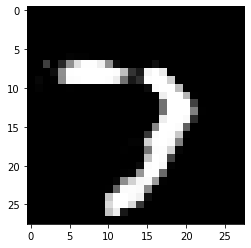

In [106]:
plt.imshow(y_pred[17].reshape(28,28))
plt.gray()
#This is the predicted image. As you can see this is pretty good given the fact that even the training samples were noisy.

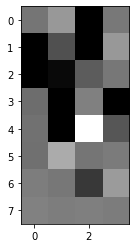

In [107]:
plt.imshow(y_pred_decoder[17].reshape(8,4))
plt.gray()
#This is the output of the encoded image.

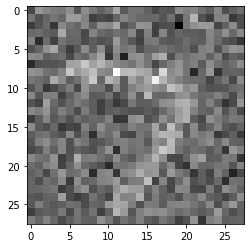

In [108]:
plt.imshow(X_test_noisy[17].reshape(28,28))
#This is the noisy image. I could see something that resembles a 7, but it is unclear what that is. According to me this is magic.

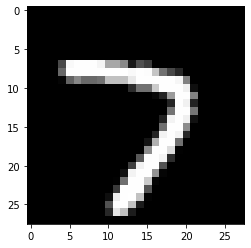

In [105]:
plt.imshow(X_test[17].reshape(28,28))
plt.gray()
#The actual image